In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression

In [2]:
data = pd.read_csv("INR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-21,81.519897,81.930199,81.539597,81.519897,81.519897,0
1,2022-11-22,81.727699,81.994797,81.603401,81.727699,81.727699,0
2,2022-11-23,81.714996,81.915001,81.683098,81.714996,81.714996,0
3,2022-11-24,81.632896,81.870003,81.579498,81.632896,81.632896,0
4,2022-11-25,81.655403,81.851799,81.414497,81.655403,81.655403,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [4]:
# drop the 'Volume' column
data = data.drop(columns=['Volume'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
dtypes: float64(5), object(1)
memory usage: 12.4+ KB


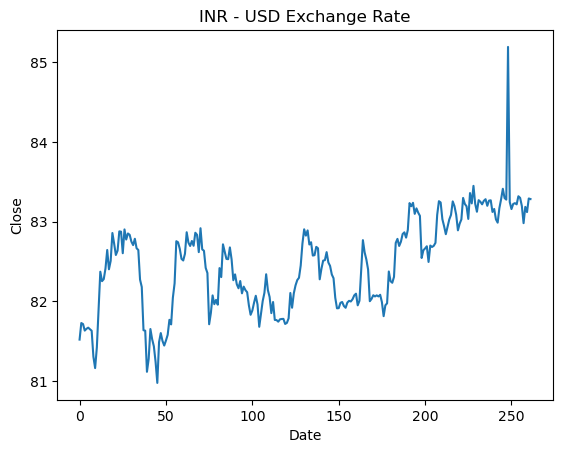

In [6]:
plt.title("INR - USD Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

               Open      High       Low     Close  Adj Close
Open       1.000000  0.931353  0.923162  0.999999   0.999999
High       0.931353  1.000000  0.905093  0.931354   0.931354
Low        0.923162  0.905093  1.000000  0.923203   0.923203
Close      0.999999  0.931354  0.923203  1.000000   1.000000
Adj Close  0.999999  0.931354  0.923203  1.000000   1.000000


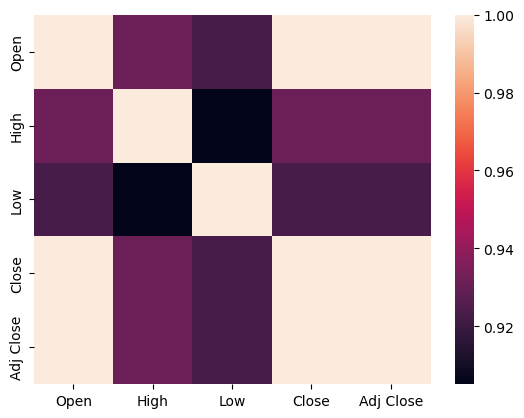

In [7]:
corr_data = data.loc[ : , data.columns != 'Date'].corr()
# corr_data = data.loc[ : , ~data.columns.isin(['Date', 'Volume'])].corr()
print(corr_data)
sns.heatmap(corr_data)
plt.show()

In [8]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [11]:
# Evaluating the Model Performance

from sklearn.metrics import r2_score
r2_score(ytest, ypred)

0.8853498549353337

In [12]:
df = pd.DataFrame(data={"Predicted Rate": ypred})
print(df.head())

   Predicted Rate
0       83.449799
1       83.086998
2       83.086098
3       82.003700
4       82.691498



**Getting the dates next to the predicted value**

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [14]:
from datetime import datetime, timedelta

last_date = data['Date'].max()
future_dates = [last_date + timedelta(days=i) for i in range(1, 6)]
future_df = pd.DataFrame({'Date': future_dates})

In [15]:
future_df

,Date
0,2023-11-22
1,2023-11-23
2,2023-11-24
3,2023-11-25
4,2023-11-26


In [16]:
df = pd.concat([future_df, df],axis = 1)

In [17]:
df.head()

,Date,Predicted Rate
0,2023-11-22,83.449799
1,2023-11-23,83.086998
2,2023-11-24,83.086098
3,2023-11-25,82.003700
4,2023-11-26,82.691498
